<a href="https://colab.research.google.com/github/SiLiKhon/RICH_GAN_misc/blob/master/RICH_Data_Overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RICH Data Overview

## Get the data

The training sample is shared [here](https://cernbox.cern.ch/index.php/s/RkZoMRBofrhqzZm).

These are simulated detector responses for 6 particle types (below are per-file links to the same files as above):



*   electrons https://cernbox.cern.ch/index.php/s/q5ZwDYfvOXJmnBR
*   kaons https://cernbox.cern.ch/index.php/s/nfBRDGCagdgor3q
*   muons https://cernbox.cern.ch/index.php/s/jfw0Nhyw8gYNBhk
*   pions https://cernbox.cern.ch/index.php/s/dyZJGMZuVRW0Kgg
*   protons https://cernbox.cern.ch/index.php/s/SQ6G6dmLOLTvMuz
*   ghosts https://cernbox.cern.ch/index.php/s/9Ui4xKerEDdw7Fv (these are 'fake' tracks - i.e. random tracker hits that look like a track from a real particle)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_pion = pd.read_csv('../data/v1_pion_train.csv')
df_kaon = pd.read_csv('../data/v1_kaon_train.csv')
df_electron = pd.read_csv('../data/v1_electron_train.csv')
df_proton = pd.read_csv('../data/v1_proton_train.csv')
df_muon = pd.read_csv('../data/v1_muon_train.csv')
df_ghost = pd.read_csv('../data/v1_ghost_train.csv')

In [3]:
all_dfs = {}
all_dfs['pion'] = df_pion.copy()
all_dfs['kaon'] = df_kaon.copy()
all_dfs['electron'] = df_electron.copy()
all_dfs['proton'] = df_proton.copy()
all_dfs['muon'] = df_muon.copy()
all_dfs['ghost'] = df_ghost.copy()
df_names = all_dfs.keys()
print(df_names)
for name in df_names:
    print(name)

dict_keys(['muon', 'pion', 'ghost', 'kaon', 'proton', 'electron'])
muon
pion
ghost
kaon
proton
electron


In [4]:
print(df_pion.columns)
print(df_kaon.columns)

Index(['TrackPt', 'TrackP', 'NumLongTracks', 'MCParticleType', 'RichDLLbt',
       'RichDLLk', 'RichDLLmu', 'RichDLLp', 'RichDLLe', 'TrackEta'],
      dtype='object')
Index(['TrackPt', 'TrackP', 'NumLongTracks', 'MCParticleType', 'RichDLLbt',
       'RichDLLk', 'RichDLLmu', 'RichDLLp', 'RichDLLe', 'TrackEta'],
      dtype='object')


Input variables are:
*   `TrackP` – full momentum of the particle
*   `TrackPt` – length of the momentum projection to the XY plane
*   `TrackEta` – track [pseudorapidity](https://en.wikipedia.org/wiki/Pseudorapidity)
*   `NumLongTracks` – number of reconstructed tracks in current event

Please note that among P, Pt and ETA there are only **two** independant variables. 


The variables to predict are:

*   `RichDLLbt`
*   `RichDLLk`
*   `RichDLLmu`
*   `RichDLLp`
*   `RichDLLe`


There's also one additional variable:

*   `MCParticleType` – particle [PDG code](http://pdg.lbl.gov/2007/reviews/montecarlorpp.pdf)




In [5]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [6]:
df_pion

,TrackPt,TrackP,NumLongTracks,MCParticleType,RichDLLbt,RichDLLk,RichDLLmu,RichDLLp,RichDLLe,TrackEta
0,292.450,5383.890,95.000,-211,-4.892,-4.892,1.189,-4.892,-8.548,3.605
1,537.122,5875.910,23.000,-211,-24.281,-24.281,-9.220,-24.281,-30.771,3.083
2,996.601,5114.390,61.000,211,-30.705,-30.705,-27.577,-30.705,-53.311,2.319
3,514.304,20254.830,72.000,211,-1.613,-1.255,-2.074,-1.613,-6.002,4.366
4,303.680,3026.860,43.000,211,-0.493,-0.493,0.473,-0.493,-17.818,2.990
5,843.326,27110.760,51.000,-211,-26.254,-12.147,-1.997,-25.374,-5.050,4.163
6,298.700,20256.340,36.000,-211,-17.202,-12.925,-5.796,-17.202,-15.198,4.910
7,411.469,22988.080,27.000,211,-9.156,-19.364,-1.460,-9.156,-5.865,4.716
8,435.971,8252.350,11.000,-211,-8.232,-8.232,-5.245,-8.232,-22.029,3.633
9,265.429,3243.400,27.000,-211,-14.874,-14.874,-34.306,-14.874,-44.342,3.194


In [7]:
df_pion.describe()

,TrackPt,TrackP,NumLongTracks,MCParticleType,RichDLLbt,RichDLLk,RichDLLmu,RichDLLp,RichDLLe,TrackEta
count,1000006.000,1000006.000,1000006.000,1000006.000,1000006.000,1000006.000,1000006.000,1000006.000,1000006.000,1000006.000
mean,610.859,11657.752,50.008,0.405,-40.588,-41.348,-33.636,-40.810,-44.644,3.508
std,611.034,15374.533,22.960,211.000,156.393,156.398,156.942,156.394,155.906,0.759
min,5.805,1120.040,1.000,-211.000,-999.000,-999.000,-999.000,-999.000,-999.000,1.539
25%,273.211,3932.927,33.000,-211.000,-26.094,-26.820,-13.092,-26.310,-30.334,2.924
50%,443.466,6965.105,47.000,211.000,-11.370,-11.575,-4.306,-11.450,-15.763,3.506
75%,737.745,13408.570,64.000,211.000,-0.571,-0.848,-0.352,-0.645,-5.094,4.095
max,65425.641,1067608.625,183.000,211.000,51.083,76.814,129.430,51.083,97.278,8.133


In [8]:
df_kaon.describe()

,TrackPt,TrackP,NumLongTracks,MCParticleType,RichDLLbt,RichDLLk,RichDLLmu,RichDLLp,RichDLLe,TrackEta
count,999993.000,999993.000,999993.000,999993.000,999993.000,999993.000,999993.000,999993.000,999993.000,999993.000
mean,917.170,17207.830,49.570,4.437,-4.132,1.683,-17.208,-4.545,-20.286,3.480
std,870.250,21471.422,23.126,320.969,125.769,126.901,123.420,125.709,123.263,0.773
min,19.675,1143.810,1.000,-321.000,-999.000,-999.000,-999.000,-999.000,-999.000,1.542
25%,406.408,5646.150,32.000,-321.000,1.495,4.762,-3.454,1.085,-8.592,2.874
50%,675.000,10416.780,46.000,321.000,10.576,14.217,-0.926,10.074,-2.711,3.477
75%,1129.237,20396.689,64.000,321.000,20.874,25.463,0.285,20.370,-0.032,4.085
max,80601.172,1063457.375,183.000,321.000,75.218,190.337,96.350,73.100,91.978,5.946


In [9]:
df_electron.describe()

,TrackPt,TrackP,NumLongTracks,MCParticleType,RichDLLbt,RichDLLk,RichDLLmu,RichDLLp,RichDLLe,TrackEta
count,1000004.000,1000004.000,1000004.000,1000004.000,1000004.000,1000004.000,1000004.000,1000004.000,1000004.000,1000004.000
mean,774.410,12006.706,45.238,-0.033,-69.271,-70.150,-60.696,-69.842,-42.234,3.458
std,1022.024,18809.613,22.536,11.000,244.831,244.747,246.536,244.784,252.584,0.764
min,6.318,1163.420,1.000,-11.000,-999.000,-999.000,-999.000,-999.000,-999.000,1.559
25%,203.142,3426.308,28.000,-11.000,-15.329,-15.705,-2.069,-15.707,1.263,2.865
50%,420.032,6069.970,42.000,-11.000,0.000,0.000,0.942,0.000,13.302,3.464
75%,936.594,12578.743,59.000,11.000,4.740,4.360,7.004,4.620,34.068,4.055
max,40210.055,1236918.250,194.000,11.000,53.360,104.949,93.838,51.369,220.983,6.961


In [10]:
df_proton.describe()

,TrackPt,TrackP,NumLongTracks,MCParticleType,RichDLLbt,RichDLLk,RichDLLmu,RichDLLp,RichDLLe,TrackEta
count,999994.000,999994.000,999994.000,999994.000,999994.000,999994.000,999994.000,999994.000,999994.000,999994.000
mean,951.633,17670.202,50.566,81.128,-0.556,-3.917,-16.145,1.405,-19.282,3.426
std,811.404,22202.178,23.011,2210.513,121.915,121.295,119.364,122.295,119.240,0.778
min,8.960,1164.830,1.000,-2212.000,-999.000,-999.000,-999.000,-999.000,-999.000,1.541
25%,434.631,5529.433,34.000,-2212.000,3.522,1.779,-3.392,4.820,-8.775,2.805
50%,730.671,10457.040,48.000,2212.000,12.889,9.151,-0.708,14.443,-2.299,3.418
75%,1217.481,21094.359,65.000,2212.000,23.332,18.177,0.350,24.922,0.191,4.030
max,37309.594,1347936.625,194.000,2212.000,79.556,91.176,58.315,151.154,122.141,7.627


In [11]:
df_muon.describe()

,TrackPt,TrackP,NumLongTracks,MCParticleType,RichDLLbt,RichDLLk,RichDLLmu,RichDLLp,RichDLLe,TrackEta
count,1000001.000,1000001.000,1000001.000,1000001.000,1000001.000,1000001.000,1000001.000,1000001.000,1000001.000,1000001.000
mean,1977.057,30194.521,41.559,0.005,-40.284,-39.560,-9.067,-42.075,-19.117,3.233
std,3133.910,45952.457,21.798,13.000,117.335,117.966,118.211,117.723,116.849,0.754
min,8.311,1109.380,1.000,-13.000,-999.000,-999.000,-999.000,-999.000,-999.000,1.543
25%,605.893,6458.260,25.000,-13.000,-45.639,-45.002,-0.273,-48.647,-9.534,2.628
50%,1391.642,15442.470,38.000,13.000,-21.981,-17.229,0.507,-22.000,-1.107,3.185
75%,2587.355,35885.129,54.000,13.000,-2.017,-0.897,5.521,-2.410,0.600,3.797
max,578204.750,4750951.000,182.000,13.000,61.730,124.330,155.860,61.730,93.894,7.282


In [12]:
df_ghost.describe()

,TrackPt,TrackP,NumLongTracks,MCParticleType,RichDLLbt,RichDLLk,RichDLLmu,RichDLLp,RichDLLe,TrackEta
count,999995.000,999995.000,999995.000,999995.000,999995.000,999995.000,999995.000,999995.000,999995.000,999995.000
mean,385.563,8576.308,58.258,0.000,-156.869,-157.162,-157.718,-156.940,-159.754,3.868
std,2120.557,30754.792,24.609,0.000,362.826,362.704,362.358,362.797,361.703,0.757
min,0.451,1118.740,1.000,0.000,-999.000,-999.000,-999.000,-999.000,-999.000,1.539
25%,113.098,2821.880,40.000,0.000,-12.306,-12.381,-8.406,-12.331,-20.574,3.374
50%,205.899,4601.630,55.000,0.000,0.000,0.000,-1.542,0.000,-5.545,3.930
75%,404.584,8632.430,74.000,0.000,2.399,2.161,0.619,2.334,1.464,4.411
max,633395.438,4969893.000,194.000,0.000,70.041,128.702,119.712,115.482,179.980,10.430


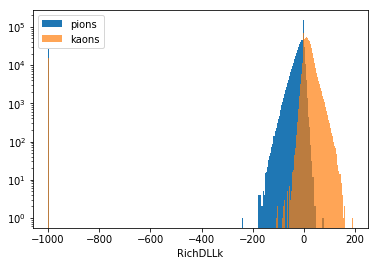

In [13]:
bins = np.linspace(
        start=min(df_pion.RichDLLk.min(), df_kaon.RichDLLk.min(),
                  df_electron.RichDLLk.min(), df_proton.RichDLLk.mean(), df_muon.RichDLLk.mean()
                 ), 
        stop =max(df_pion.RichDLLk.max(), df_kaon.RichDLLk.max(),
                  df_electron.RichDLLk.max(), df_proton.RichDLLk.max(), df_muon.RichDLLk.max()
                 ), 
        num=601
    )

plt.hist(df_pion.RichDLLk, bins=bins, label='pions')
plt.hist(df_kaon.RichDLLk, bins=bins, label='kaons', alpha=0.7)
plt.yscale('log')
plt.legend()
plt.xlabel('RichDLLk');

One can see there's a peak of outliers at the left handside of the plot. Let's not bother about it so far.

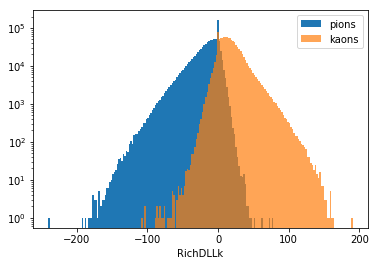

In [14]:
not_outlier_pion = df_pion.RichDLLk > -500
not_outlier_kaon = df_kaon.RichDLLk > -500

bins = np.linspace(
        start=min(df_pion.RichDLLk[not_outlier_pion].min(), df_kaon.RichDLLk[not_outlier_kaon].min()), 
        stop =max(df_pion.RichDLLk[not_outlier_pion].max(), df_kaon.RichDLLk[not_outlier_kaon].max()), 
        num=201
    )

plt.hist(df_pion.RichDLLk, bins=bins, label='pions')
plt.hist(df_kaon.RichDLLk, bins=bins, label='kaons', alpha=0.7)
plt.yscale('log')
plt.legend()
plt.xlabel('RichDLLk');

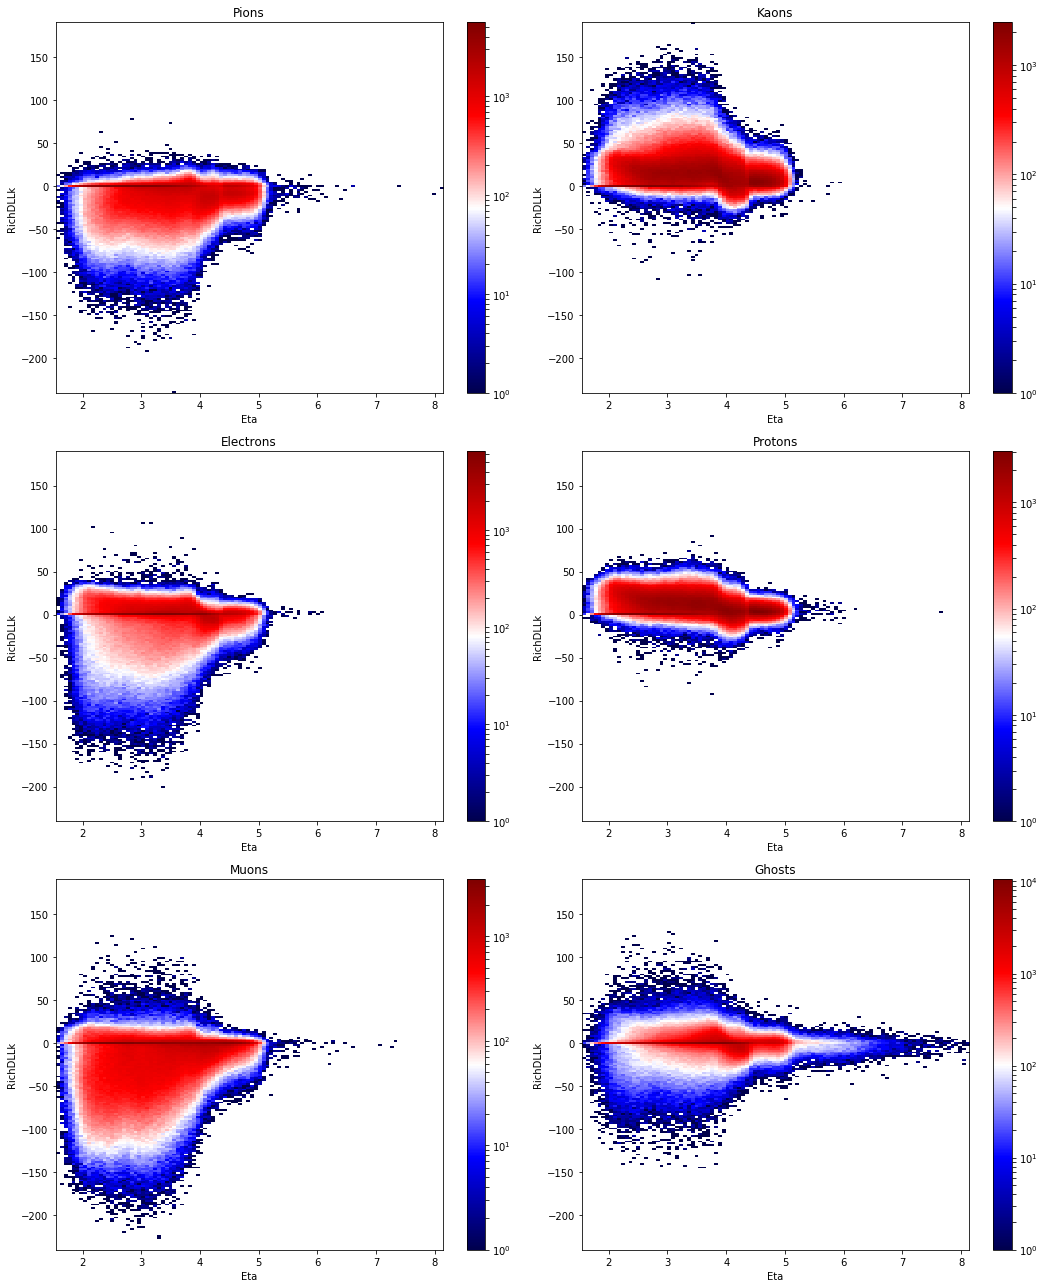

In [15]:
import matplotlib.colors as colors

fig, ((ax_pion, ax_kaon), (ax_electron, ax_proton), (ax_muon, ax_ghost)) = plt.subplots(
                                    nrows=3,
                                    ncols=2,
                                    figsize=(15, 18)
                                )

_, bins_x, bins_y, img_pion = \
    ax_pion.hist2d(
            x=df_pion.TrackEta,
            y=df_pion.RichDLLk,
            bins=(100, bins),
            cmap='seismic',
            norm=colors.LogNorm()
        )
_, _, _, img_kaon = \
    ax_kaon.hist2d(
            x=df_kaon.TrackEta,
            y=df_kaon.RichDLLk,
            bins=(bins_x, bins_y),
            cmap='seismic',
            norm=colors.LogNorm()
        )
_, _, _, img_electron = \
    ax_electron.hist2d(
            x=df_electron.TrackEta,
            y=df_electron.RichDLLk,
            bins=(bins_x, bins_y),
            cmap='seismic',
            norm=colors.LogNorm()
        )
_, _, _, img_proton = \
    ax_proton.hist2d(
            x=df_proton.TrackEta,
            y=df_proton.RichDLLk,
            bins=(bins_x, bins_y),
            cmap='seismic',
            norm=colors.LogNorm()
        )
_, _, _, img_muon = \
    ax_muon.hist2d(
            x=df_muon.TrackEta,
            y=df_muon.RichDLLk,
            bins=(bins_x, bins_y),
            cmap='seismic',
            norm=colors.LogNorm()
        )
_, _, _, img_ghost = \
    ax_ghost.hist2d(
            x=df_ghost.TrackEta,
            y=df_ghost.RichDLLk,
            bins=(bins_x, bins_y),
            cmap='seismic',
            norm=colors.LogNorm()
        )

plt.colorbar(img_pion, ax=ax_pion)
ax_pion.set_xlabel('Eta')
ax_pion.set_ylabel('RichDLLk')
ax_pion.set_title('Pions')
plt.colorbar(img_kaon, ax=ax_kaon)
ax_kaon.set_xlabel('Eta')
ax_kaon.set_ylabel('RichDLLk')
ax_kaon.set_title('Kaons')
plt.colorbar(img_electron, ax=ax_electron)
ax_electron.set_xlabel('Eta')
ax_electron.set_ylabel('RichDLLk')
ax_electron.set_title('Electrons')
plt.colorbar(img_proton, ax=ax_proton)
ax_proton.set_xlabel('Eta')
ax_proton.set_ylabel('RichDLLk')
ax_proton.set_title('Protons')
plt.colorbar(img_muon, ax=ax_muon)
ax_muon.set_xlabel('Eta')
ax_muon.set_ylabel('RichDLLk')
ax_muon.set_title('Muons')
plt.colorbar(img_ghost, ax=ax_ghost)
ax_ghost.set_xlabel('Eta')
ax_ghost.set_ylabel('RichDLLk')
ax_ghost.set_title('Ghosts')

fig.tight_layout();

## Look at the datasets

In [16]:
given_var = ['TrackPt', 'TrackP', 'TrackEta', 'NumLongTracks']
x_bins = np.zeros((len(given_var), 201))

for i in range(len(given_var)):
    col = given_var[i]
    x_bins[i] = np.linspace(
        start=min(df_pion[col].min(), df_kaon[col].min(),
                  df_electron[col].min(), df_proton[col].min(),
                  df_muon[col].min(), df_ghost[col].min()
                 ), 
        stop =max(df_pion[col].max(), df_kaon[col].max(), df_electron[col].max(),
                  df_proton[col].max(), df_muon[col].max(), df_ghost[col].max()
                 ), 
        num=201
    )


In [17]:
pred_var = ['RichDLLbt', 'RichDLLk', 'RichDLLmu', 'RichDLLp', 'RichDLLe']
y_bins = np.zeros((len(pred_var), 201))

col = 'RichDLLk'
non_outlier_pion = df_pion[col] > -500
non_outlier_kaon = df_kaon[col] > -500
non_outlier_electron = df_electron[col] > -500
non_outlier_proton = df_proton[col] > -500
non_outlier_muon = df_muon[col] > -500
non_outlier_ghost = df_ghost[col] > -500

for i in range(len(pred_var)):
    col = pred_var[i]
    y_bins[i] = np.linspace(
        start=min(df_pion[col][non_outlier_pion].min(), df_kaon[col][non_outlier_kaon].min(),
                  df_electron[col][non_outlier_electron].min(), df_proton[col][non_outlier_proton].min(),
                  df_muon[col][non_outlier_muon].min(), df_ghost[col][non_outlier_ghost].min()
                 ), 
        stop =max(df_pion[col].max(), df_kaon[col].max(), df_electron[col].max(),
                  df_proton[col].max(), df_muon[col].max(), df_ghost[col].max()
                 ), 
        num=201
    )

In [18]:
def plot_df(df, bins, label, cols):
    fig, axes = plt.subplots(nrows=1, ncols=len(cols), figsize=(20, 4))
    for i in range(len(cols)):
        axes[i].hist(df[cols[i]], bins=bins[i], label=label)
        axes[i].set_yscale('log')
        axes[i].set_xlabel(cols[i])
        axes[i].set_title(label)
        axes[i].legend()
    fig.show()

/home/paul/.local/lib/python3.5/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


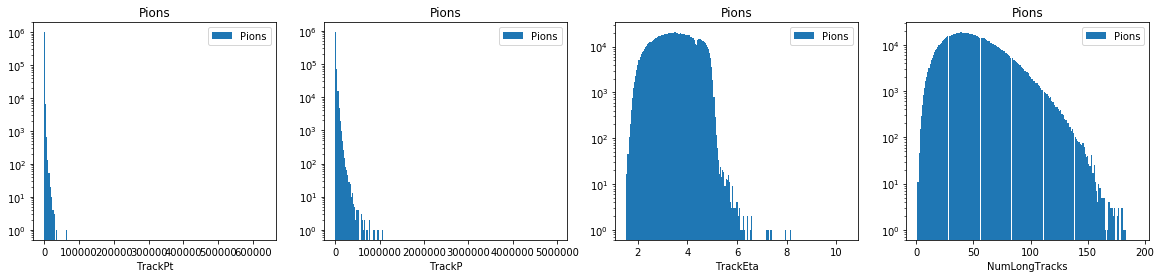

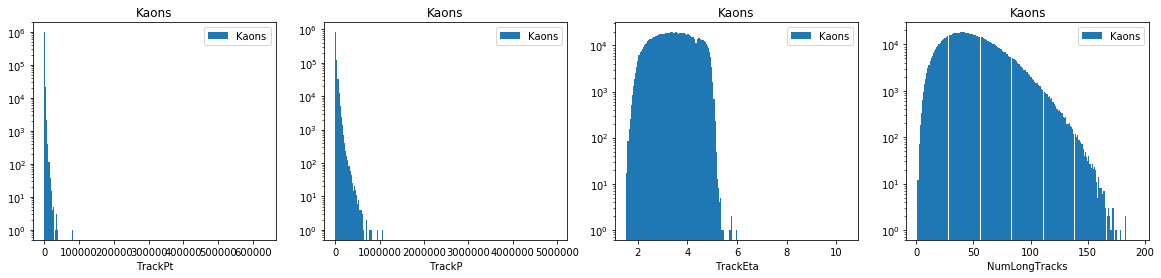

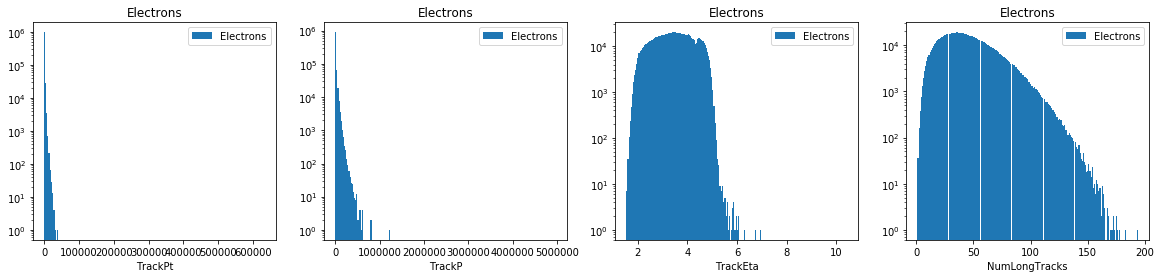

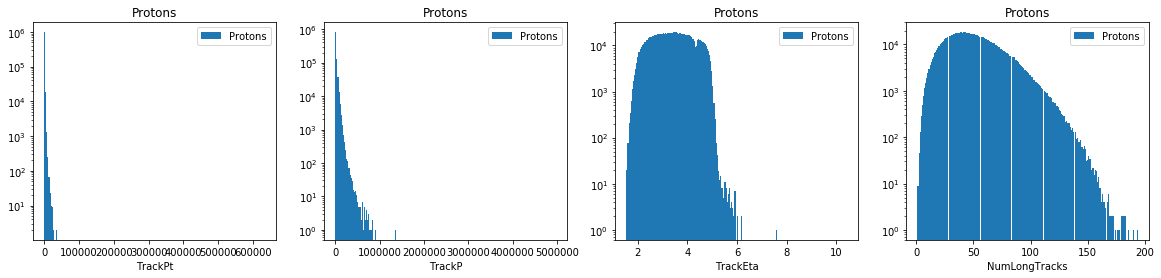

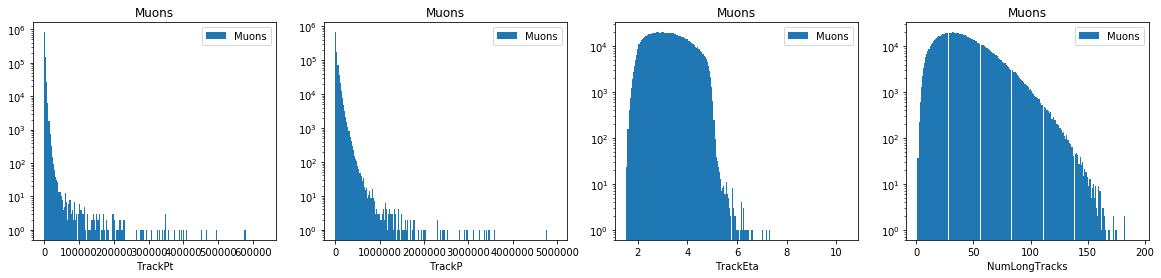

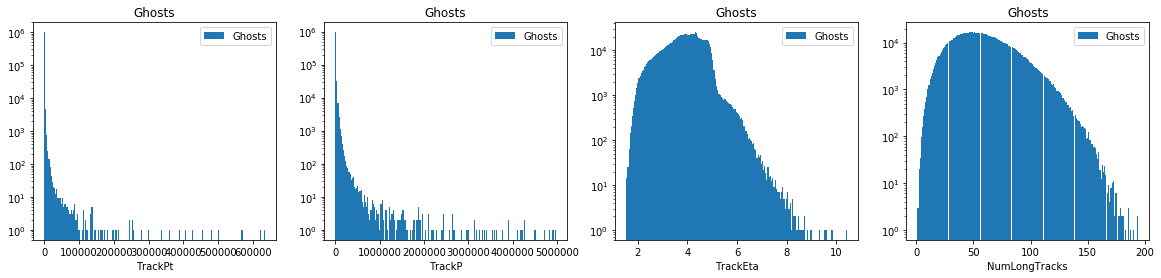

In [19]:

plot_df(df_pion, x_bins, 'Pions', given_var)
plot_df(df_kaon, x_bins, 'Kaons', given_var)
plot_df(df_electron, x_bins, 'Electrons', given_var)
plot_df(df_proton, x_bins, 'Protons', given_var)
plot_df(df_muon, x_bins, 'Muons', given_var)
plot_df(df_ghost, x_bins, 'Ghosts', given_var)

/home/paul/.local/lib/python3.5/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


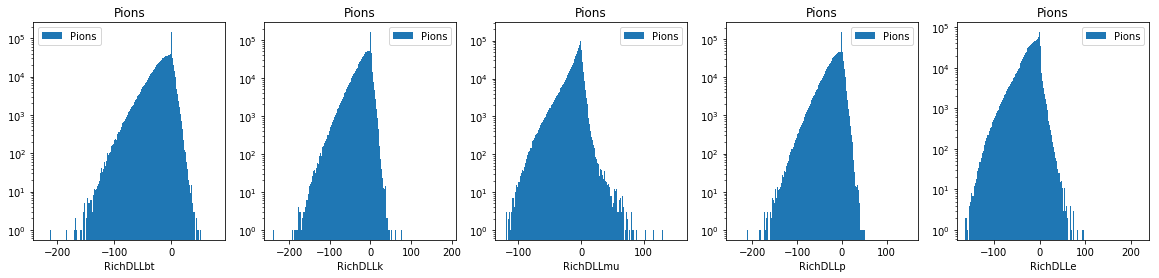

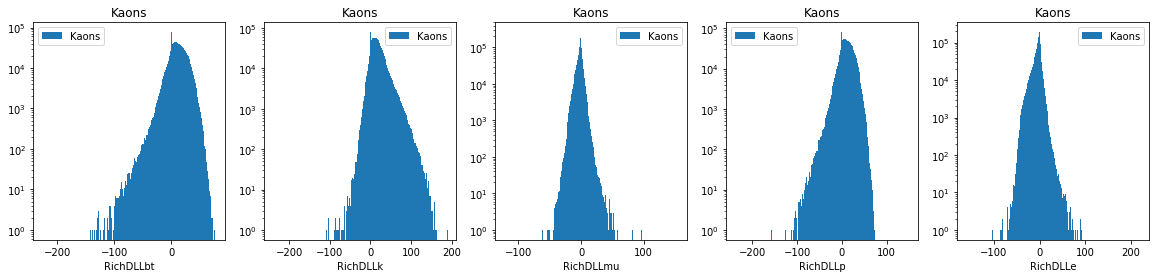

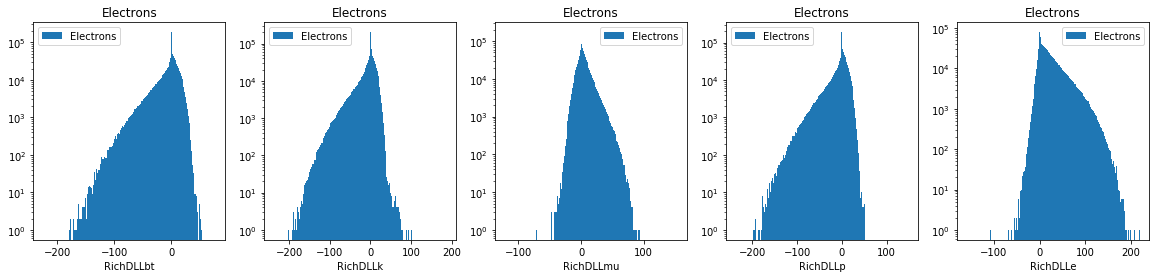

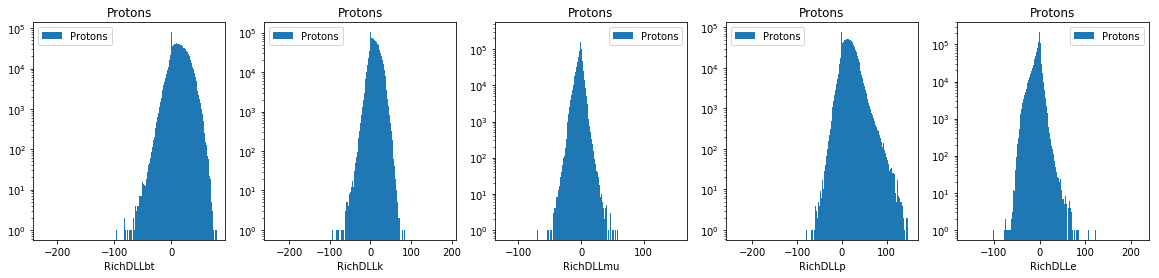

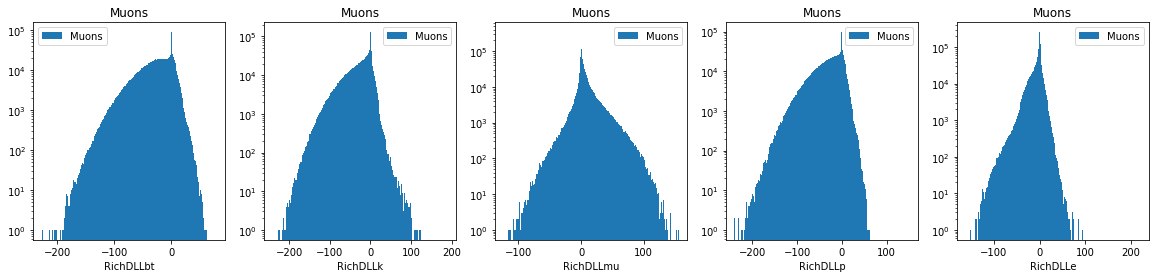

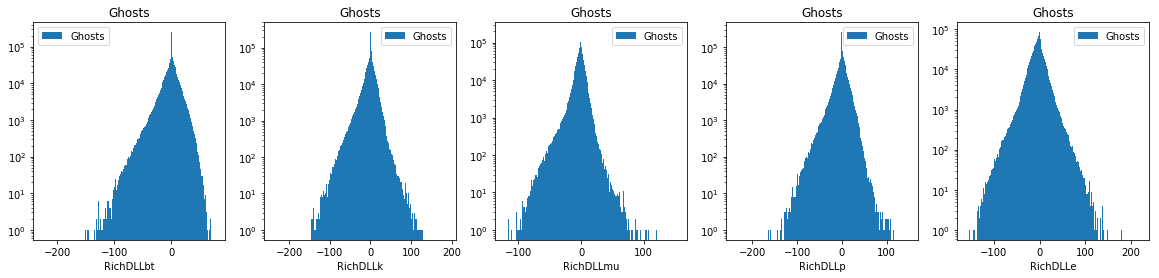

In [20]:
plot_df(df_pion, y_bins, 'Pions', pred_var)
plot_df(df_kaon, y_bins, 'Kaons', pred_var)
plot_df(df_electron, y_bins, 'Electrons', pred_var)
plot_df(df_proton, y_bins, 'Protons', pred_var)
plot_df(df_muon, y_bins, 'Muons', pred_var)
plot_df(df_ghost, y_bins, 'Ghosts', pred_var)

# The simplest model possible

In [21]:
class Model:
    def train(self, X, Y):
        self.means = {}
        self.stds = {}
        for col in Y.columns:
            self.means[col] = np.mean(Y[col])
            self.stds [col] = np.std (Y[col])

    def predict(self, X):
        prediction = pd.DataFrame()
        for col in self.means.keys():
            prediction[col] = np.random.normal(
                                loc=self.means[col],
                                scale=self.stds[col],
                                size=len(X)
                            )
        return prediction

In [22]:
from sklearn.model_selection import KFold
from scipy.stats import ks_2samp

In [23]:
def score_func(sample1, sample2, n_slices=100):
    score = 0
    #cols = x_cols + y_cols
    cols = sample1.columns
    w_normal = np.random.normal(size=(n_slices, len(cols)))
    reference = sample1.copy()[cols].values
    prediction = sample2.copy()[cols].values
    for k in range(n_slices):
        score = max(score,
                    ks_2samp(
                        np.sum(w_normal[k] * reference, axis=1),
                        np.sum(w_normal[k] * prediction, axis=1)
                    )[0]
                   )
    return score

In [24]:
x_cols = ['TrackP', 'TrackEta', 'NumLongTracks']
y_cols = ['RichDLLbt', 'RichDLLk', 'RichDLLmu', 'RichDLLp', 'RichDLLe']


def train_df(df):
    kf = KFold(n_splits=5)

    model_scores = []
    best_scores  = []

    non_outlier = df.RichDLLk > -500
    for train_index, test_index in kf.split(df[x_cols]):
        X_train = df[x_cols].iloc[train_index]
        Y_train = df[y_cols].iloc[train_index]
        X_test  = df[x_cols].iloc[test_index ]
        Y_test  = df[y_cols].iloc[test_index ]
  
        model = Model()
        model.train(X_train[non_outlier[train_index]], Y_train[non_outlier[train_index]])
        Y_pred = model.predict(X_test)
  
        model_scores.append(score_func(Y_test, Y_pred))
        best_scores.append(score_func(Y_test, Y_train))
    
    return Y_test, Y_pred, model_scores, best_scores
        

In [25]:
def visualise_df(Y_test, Y_pred, name):
    fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 20))
    i = 0
    for col in Y_pred.columns:
        _, bins, _ = axes[i].hist(Y_test[col], bins=100 , label='test'      )
        _, _   , _ = axes[i].hist(Y_pred[col], bins=bins, label='prediction', alpha=0.7)
        axes[i].legend()
        axes[i].set_xlabel("%s: %s" % (name, col))
        i += 1
    fig.show();

In [41]:
def df_scores(model_scores, best_scores):
    m = 0.
    for key in model_scores:
        m += np.mean(model_scores[key])
    print("MODEL SCORES", m / len(model_scores.keys()))
    for key in model_scores:
        print(key, np.mean(model_scores[key]))
        print(model_scores[key])

    '''
    low, high = 1., 0.
    for name in df_names:
        low = min(low, min(model_scores[name]), min(best_scores[name]))
        high = max(high, max(model_scores[name]), max(best_scores[name]))
    bins = np.linspace(start = low - 0.1, stop = high + 0.1, num=201)
    
    fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(8, 30))
    i = 0
    for name in df_names:
        axes[i].hist(model_scores[name], bins=bins, label='model')
        axes[i].hist(best_scores[name] , bins=bins, label='best possible', alpha=0.6)
        axes[i].legend()
        axes[i].set_xlabel('KS Scores of %s' % name)
        i += 1
    fig.show();
    '''

In [27]:
%%time

Y_test = {}
Y_pred = {}
model_scores = {}
best_scores = {}
ij = 0
for name in df_names:
    df = all_dfs[name].copy()
    Y_test[name], Y_pred[name], model_scores[name], best_scores[name] = train_df(df)
    ij += 1
    print(ij, name)

1 muon
2 pion
3 ghost
4 kaon
5 proton
6 electron
CPU times: user 13min 3s, sys: 1.41 s, total: 13min 5s
Wall time: 13min 5s


In [43]:
df_scores(model_scores, best_scores)

MODEL SCORES 0.30651379273940044
ghost 0.3062715313576567
[0.30987154935774675, 0.31780158900794503, 0.28366641833209166, 0.2819764098820494, 0.338041690208451]
electron 0.32491969925650366
[0.30348348258258706, 0.3994730026349868, 0.308998455007725, 0.28878855605721976, 0.323855]
pion 0.3338760293878654
[0.30123198768012327, 0.34465327673361634, 0.35213323933380336, 0.36080819595902025, 0.31055344723276385]
kaon 0.3036521473420275
[0.29804649023245117, 0.2633713168565843, 0.32776163880819403, 0.30815308153081533, 0.32092820928209276]
proton 0.27770564900584976
[0.2833314166570833, 0.2868764343821719, 0.2973064865324327, 0.2605363026815134, 0.26047760477604776]
muon 0.2926577000864996
[0.29991350043249787, 0.25368, 0.304165, 0.295235, 0.310295]


/home/paul/.local/lib/python3.5/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


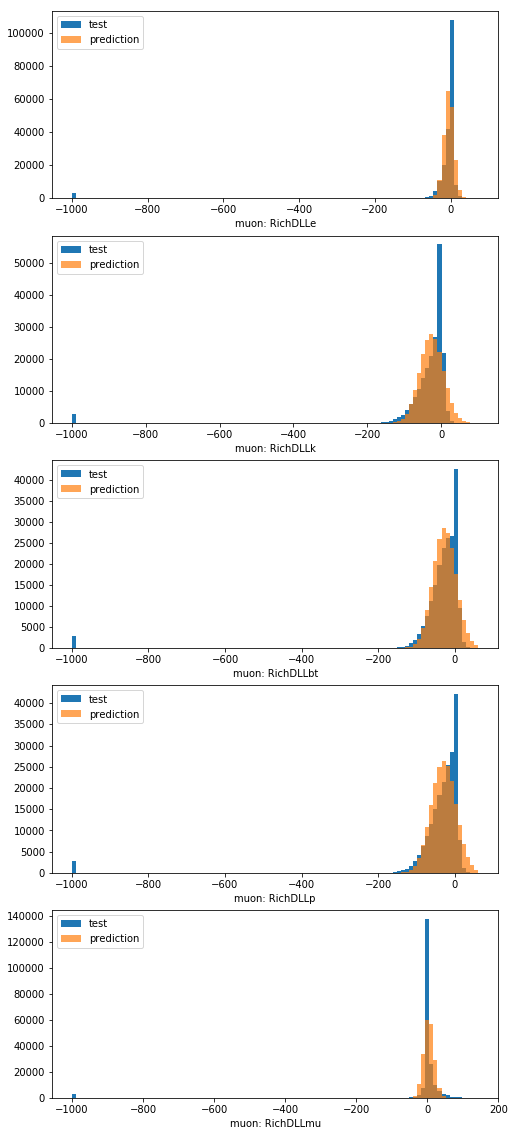

In [29]:
visualise_df(Y_test['muon'], Y_pred['muon'], 'muon')


/home/paul/.local/lib/python3.5/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


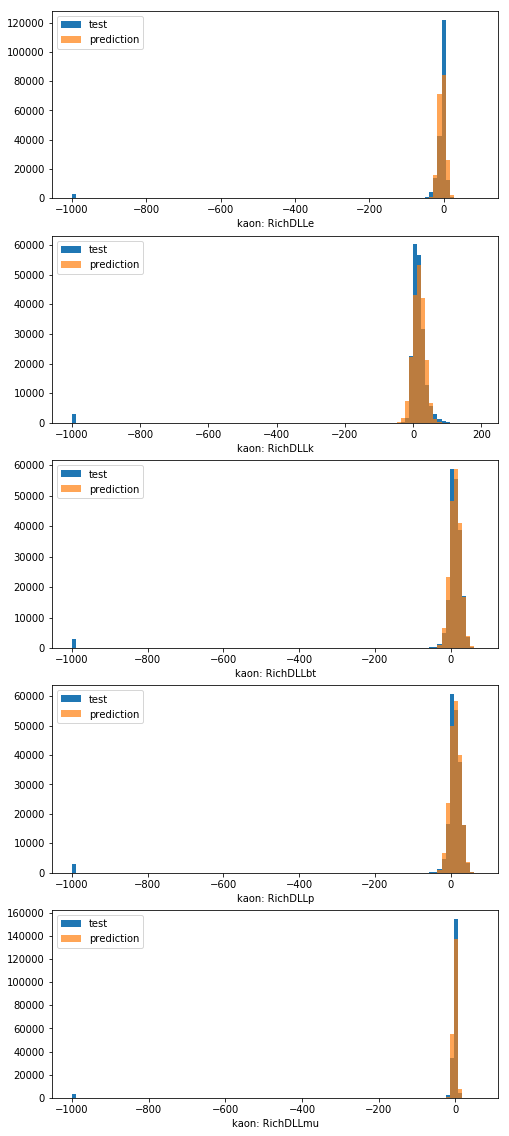

In [30]:
visualise_df(Y_test['kaon'], Y_pred['kaon'], 'kaon')


/home/paul/.local/lib/python3.5/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


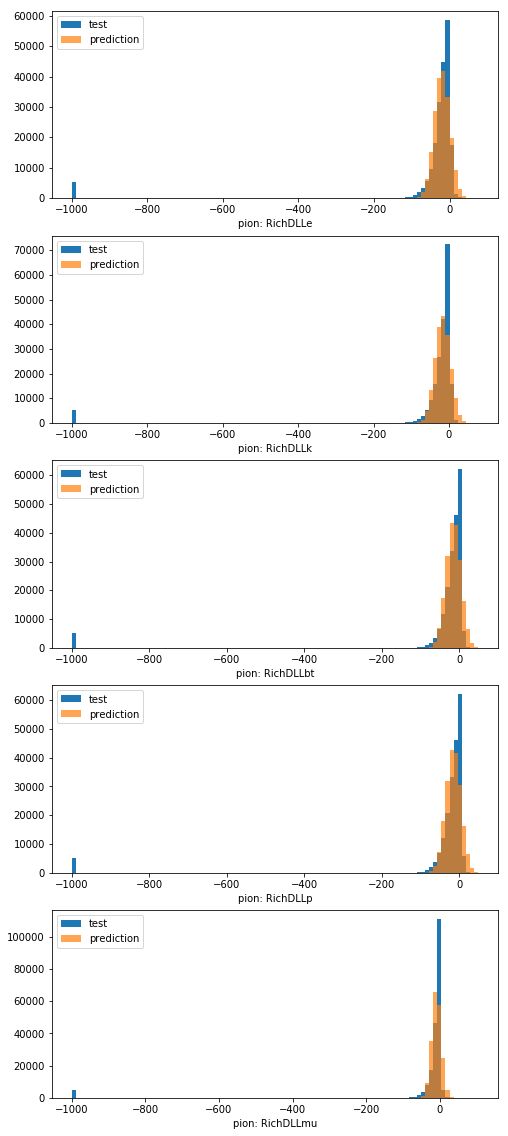

In [31]:
visualise_df(Y_test['pion'], Y_pred['pion'], 'pion')


/home/paul/.local/lib/python3.5/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


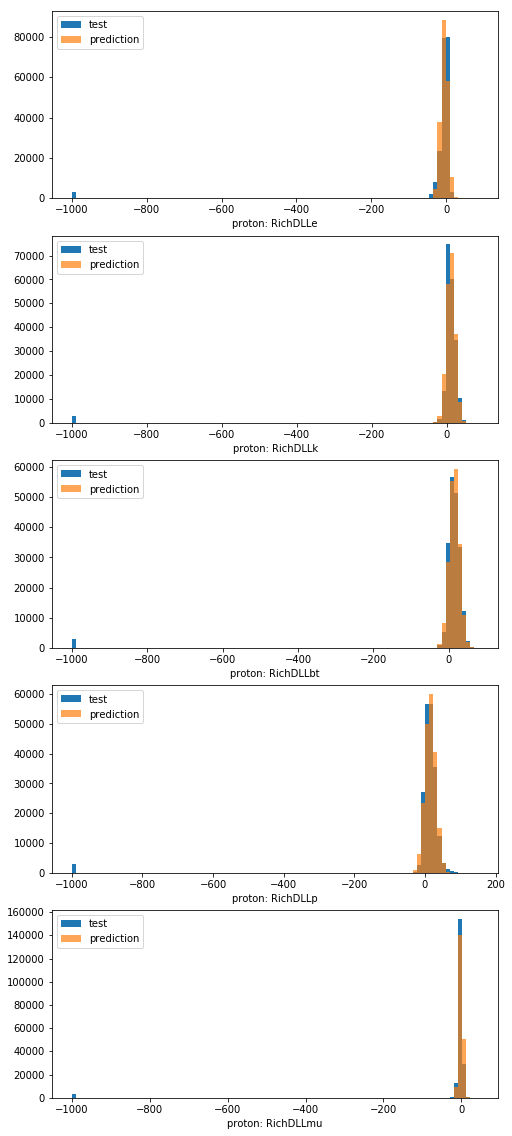

In [32]:
visualise_df(Y_test['proton'], Y_pred['proton'], 'proton')


/home/paul/.local/lib/python3.5/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


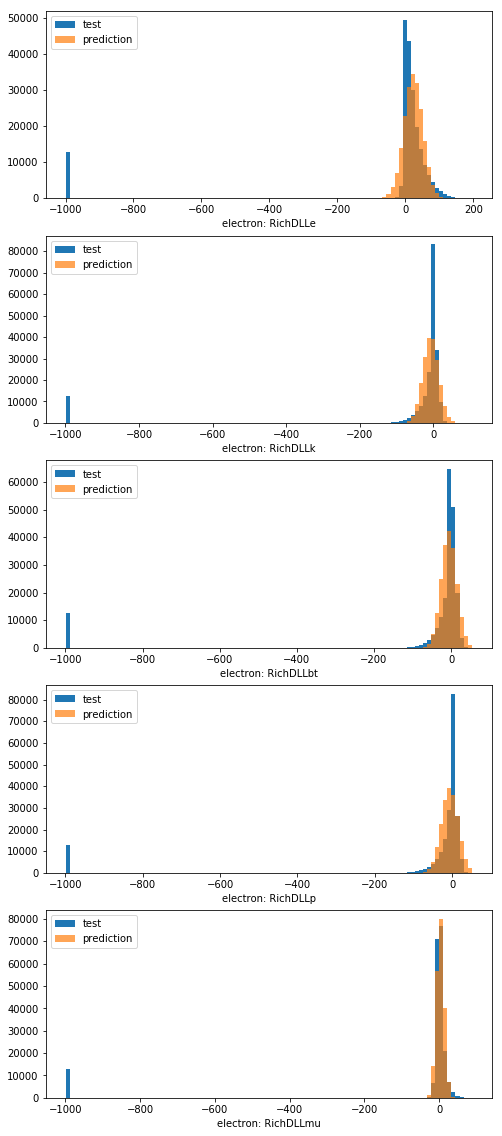

In [33]:
visualise_df(Y_test['electron'], Y_pred['electron'], 'electron')


/home/paul/.local/lib/python3.5/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


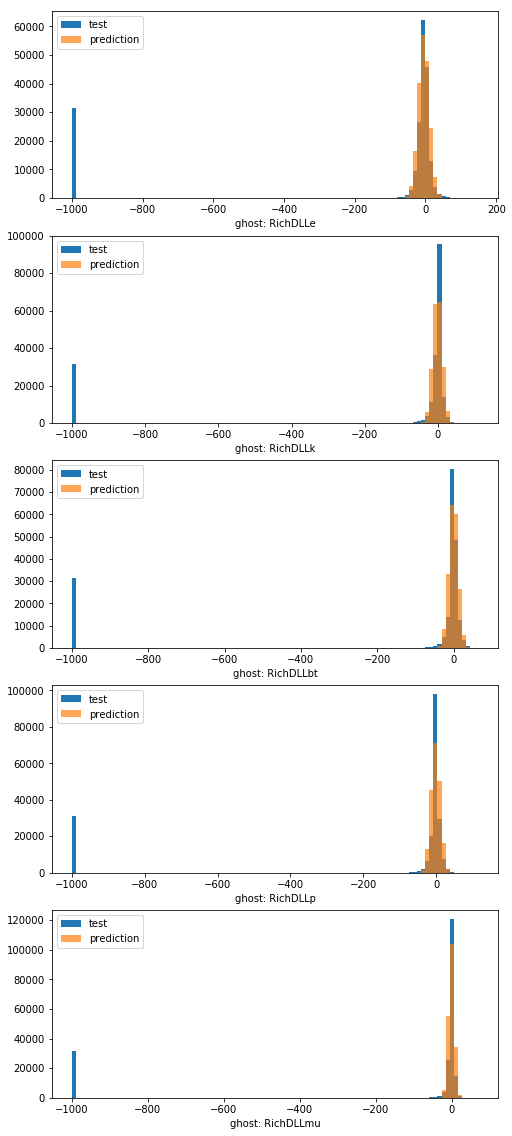

In [34]:
visualise_df(Y_test['ghost'], Y_pred['ghost'], 'ghost')
